In [1]:
from subpred.util import load_data

In [2]:
df_results_svm_calciumchloride = load_data("svc_human_calciumchloride",folder_path="../data/results").assign(Model="SVM",Substrates="Calcium/Chloride")
df_results_svm_calciumpotassium = load_data("svc_human_calciumpotassium",folder_path="../data/results").assign(Model="SVM",Substrates="Calcium/Potassium")
df_results_svm_chloridepotassium = load_data("svc_human_chloridepotassium",folder_path="../data/results").assign(Model="SVM",Substrates="Chloride/Potassium")
# df_results_svm_sugaramino = load_data("svc_human_sugaramino",folder_path="../data/results").assign(Model="SVM",Substrates="Sugar/Amino")

In [3]:
df_results_dnn_calciumchloride = load_data("dnn_human_calciumchloride",folder_path="../data/results").assign(Model="DNN",Substrates="Calcium/Chloride")
df_results_dnn_calciumpotassium = load_data("dnn_human_calciumpotassium",folder_path="../data/results").assign(Model="DNN",Substrates="Calcium/Potassium")
df_results_dnn_chloridepotassium = load_data("dnn_human_chloridepotassium",folder_path="../data/results").assign(Model="DNN",Substrates="Chloride/Potassium")
# df_results_dnn_sugaramino = load_data("dnn_human_sugaramino",folder_path="../data/results").assign(Model="DNN",Substrates="Sugar/Amino")

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_human_results = pd.concat(
    [
        df_results_svm_calciumchloride,
        df_results_svm_calciumpotassium,
        df_results_svm_chloridepotassium,
        # df_results_svm_sugaramino,
        df_results_dnn_calciumchloride,
        df_results_dnn_calciumpotassium,
        df_results_dnn_chloridepotassium,
        # df_results_dnn_sugaramino,
    ]
).copy()
df_human_results.Feature = df_human_results.Feature.str.replace("_","-")
df_human_results = df_human_results.reset_index(drop=True)
df_human_results

,Feature,Metric,Value,Model,Substrates
0,PROTT5-AA,Balanced Accuracy,0.808333,SVM,Calcium/Chloride
1,PROTT5-AA,Balanced Accuracy,0.975000,SVM,Calcium/Chloride
2,PROTT5-AA,Balanced Accuracy,0.783333,SVM,Calcium/Chloride
3,PROTT5-AA,Balanced Accuracy,0.933333,SVM,Calcium/Chloride
4,PROTT5-AA,Balanced Accuracy,0.909091,SVM,Calcium/Chloride
...,...,...,...,...,...
17995,META-STD,F1 Class 1,0.918919,DNN,Chloride/Potassium
17996,META-STD,Balanced Accuracy,0.845588,DNN,Chloride/Potassium
17997,META-STD,F1 Macro,0.853535,DNN,Chloride/Potassium
17998,META-STD,F1 Class 0,0.818182,DNN,Chloride/Potassium


In [6]:
df_human_results.Feature.unique()

array(['PROTT5-AA', 'PROSTT5-AA', 'PROSTT5-3DI', 'DUMMY', 'AAC', 'PAAC',
       'AA-KMER3', '3Di-COMP', '3Di-KMER2', '3Di-KMER3', 'COMB-KMER1',
       'COMB-KMER2', 'COMB-KMER3', 'PSSM-50-1', 'PSSM-50-3', 'PSSM-90-1',
       'PSSM-90-3', 'PSSM-META', 'META', 'META-STD'], dtype=object)

In [7]:
# df_human_results#.groupby(["Feature", "Model", "Substrates"]).median()


In [ ]:

metric = "F1 Macro"
df_human_results_filtered = (
    df_human_results[
        # df_human_results.Feature.isin(features_keep)
        (df_human_results.Metric == "F1 Macro")
    ]
    .drop("Metric", axis=1)
    .reset_index(drop=True)
)
df_human_results_filtered.Model = (
    df_human_results_filtered.Model + " " + df_human_results_filtered.Feature
)

In [9]:
sorted(df_human_results_filtered.Model.unique())

['DNN 3Di-COMP',
 'DNN 3Di-KMER2',
 'DNN 3Di-KMER3',
 'DNN AA-KMER3',
 'DNN AAC',
 'DNN COMB-KMER1',
 'DNN COMB-KMER2',
 'DNN COMB-KMER3',
 'DNN DUMMY',
 'DNN META',
 'DNN META-STD',
 'DNN PAAC',
 'DNN PROSTT5-3DI',
 'DNN PROSTT5-AA',
 'DNN PROTT5-AA',
 'DNN PSSM-50-1',
 'DNN PSSM-50-3',
 'DNN PSSM-90-1',
 'DNN PSSM-90-3',
 'DNN PSSM-META',
 'SVM 3Di-COMP',
 'SVM 3Di-KMER2',
 'SVM 3Di-KMER3',
 'SVM AA-KMER3',
 'SVM AAC',
 'SVM COMB-KMER1',
 'SVM COMB-KMER2',
 'SVM COMB-KMER3',
 'SVM DUMMY',
 'SVM META',
 'SVM META-STD',
 'SVM PAAC',
 'SVM PROSTT5-3DI',
 'SVM PROSTT5-AA',
 'SVM PROTT5-AA',
 'SVM PSSM-50-1',
 'SVM PSSM-50-3',
 'SVM PSSM-90-1',
 'SVM PSSM-90-3',
 'SVM PSSM-META']

In [10]:
df_plots = df_human_results_filtered.copy()
# df_plots.Substrates = (
#     df_plots.Substrates.str.replace("Calcium", "Ca")
#     .str.replace("Chloride", "Cl")
#     .str.replace("Potassium", "K")
# )

In [ ]:
def create_model_plot(df, hue_order, **kwargs):
    ax = sns.boxplot(df, x="Substrates",y="Value",hue="Model",hue_order=hue_order,**kwargs)
    ax.set_ylim((0,1.05))
    ax.set_ylabel("Macro F1", fontstyle='italic')
    ax.set_xlabel('Classification', fontstyle='italic')


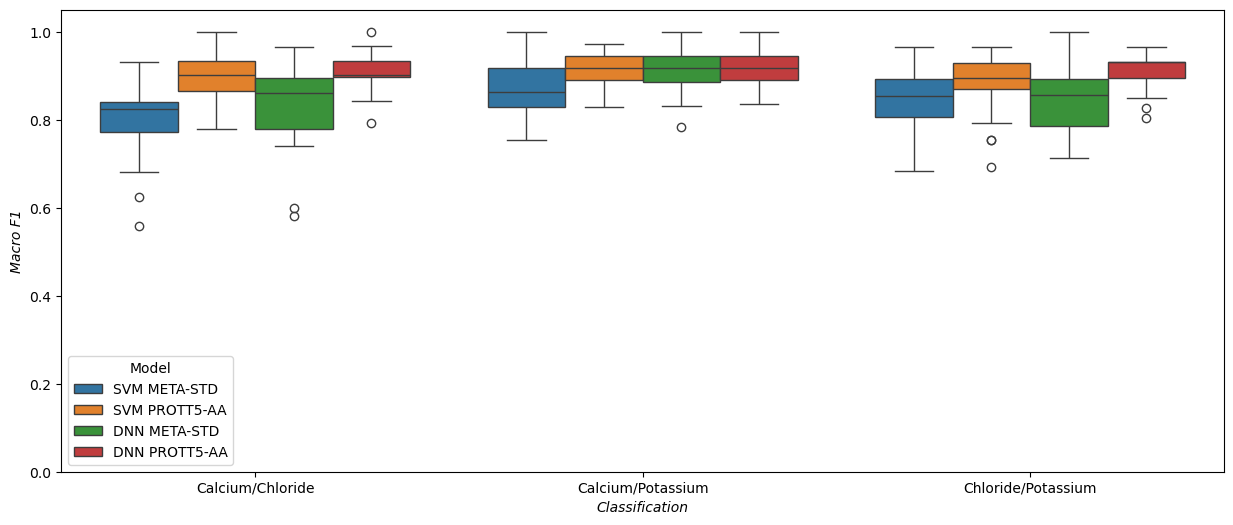

In [12]:
plt.figure(figsize=(15, 6))
create_model_plot(
    df_plots,
    hue_order=[
        "SVM META-STD",
        "SVM PROTT5-AA",
        "DNN META-STD",
        "DNN PROTT5-AA",
    ],
)
# plt.savefig("../data/results/plots_human_ion_dnn_vs_svm", dpi=300)
plt.show()

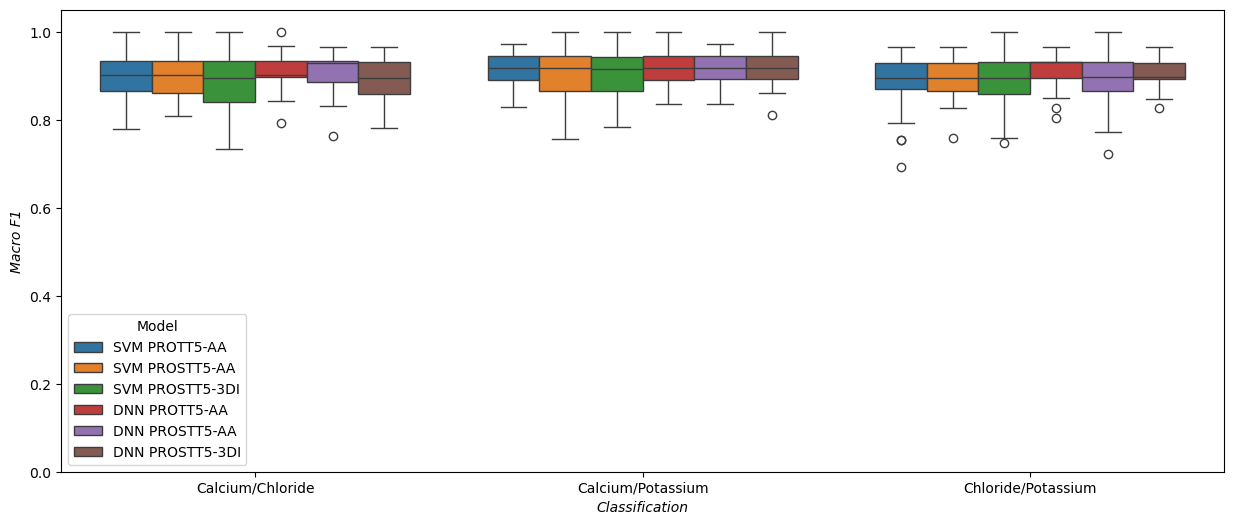

In [13]:
plt.figure(figsize=(15, 6))
create_model_plot(
    df_plots,
    hue_order=[
        "SVM PROTT5-AA",
        "SVM PROSTT5-AA",
        "SVM PROSTT5-3DI",
        "DNN PROTT5-AA",
        "DNN PROSTT5-AA",
        "DNN PROSTT5-3DI",
    ],
)

# plt.savefig("../data/results/plots_human_ion_embeddings_comparison", dpi=300)
plt.show()

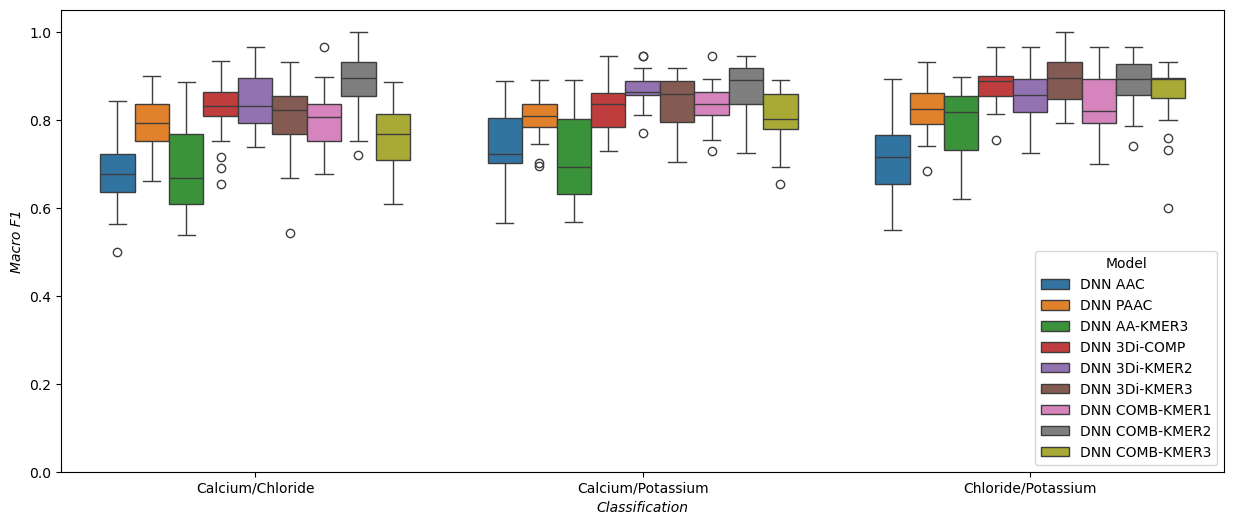

In [14]:
plt.figure(figsize=(15, 6))
create_model_plot(
    df_plots,
    hue_order=[
        "DNN AAC",
        "DNN PAAC",
        "DNN AA-KMER3",
        "DNN 3Di-COMP",
        "DNN 3Di-KMER2",
        "DNN 3Di-KMER3",
        "DNN COMB-KMER1",
        "DNN COMB-KMER2",
        "DNN COMB-KMER3",
    ],
)

# plt.savefig("../data/results/plots_human_ion_sequence_features_dnn", dpi=300)
plt.show()

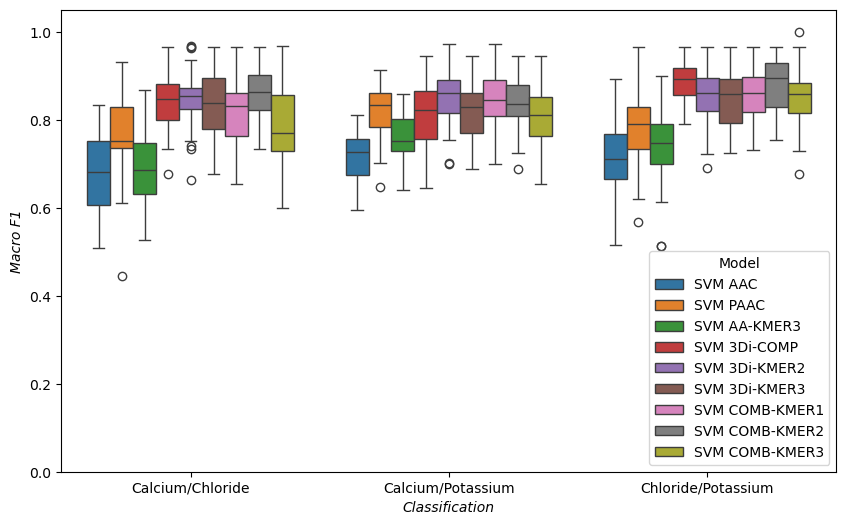

In [50]:
plt.figure(figsize=(10,6))
create_model_plot(
    df_plots,
    hue_order=[
        "SVM AAC",
        "SVM PAAC",
        "SVM AA-KMER3",
        "SVM 3Di-COMP",
        "SVM 3Di-KMER2",
        "SVM 3Di-KMER3",
        "SVM COMB-KMER1",
        "SVM COMB-KMER2",
        "SVM COMB-KMER3",
    ],
)

# plt.savefig("../data/results/plots_human_ion_sequence_features_svm", dpi=300)
plt.show()

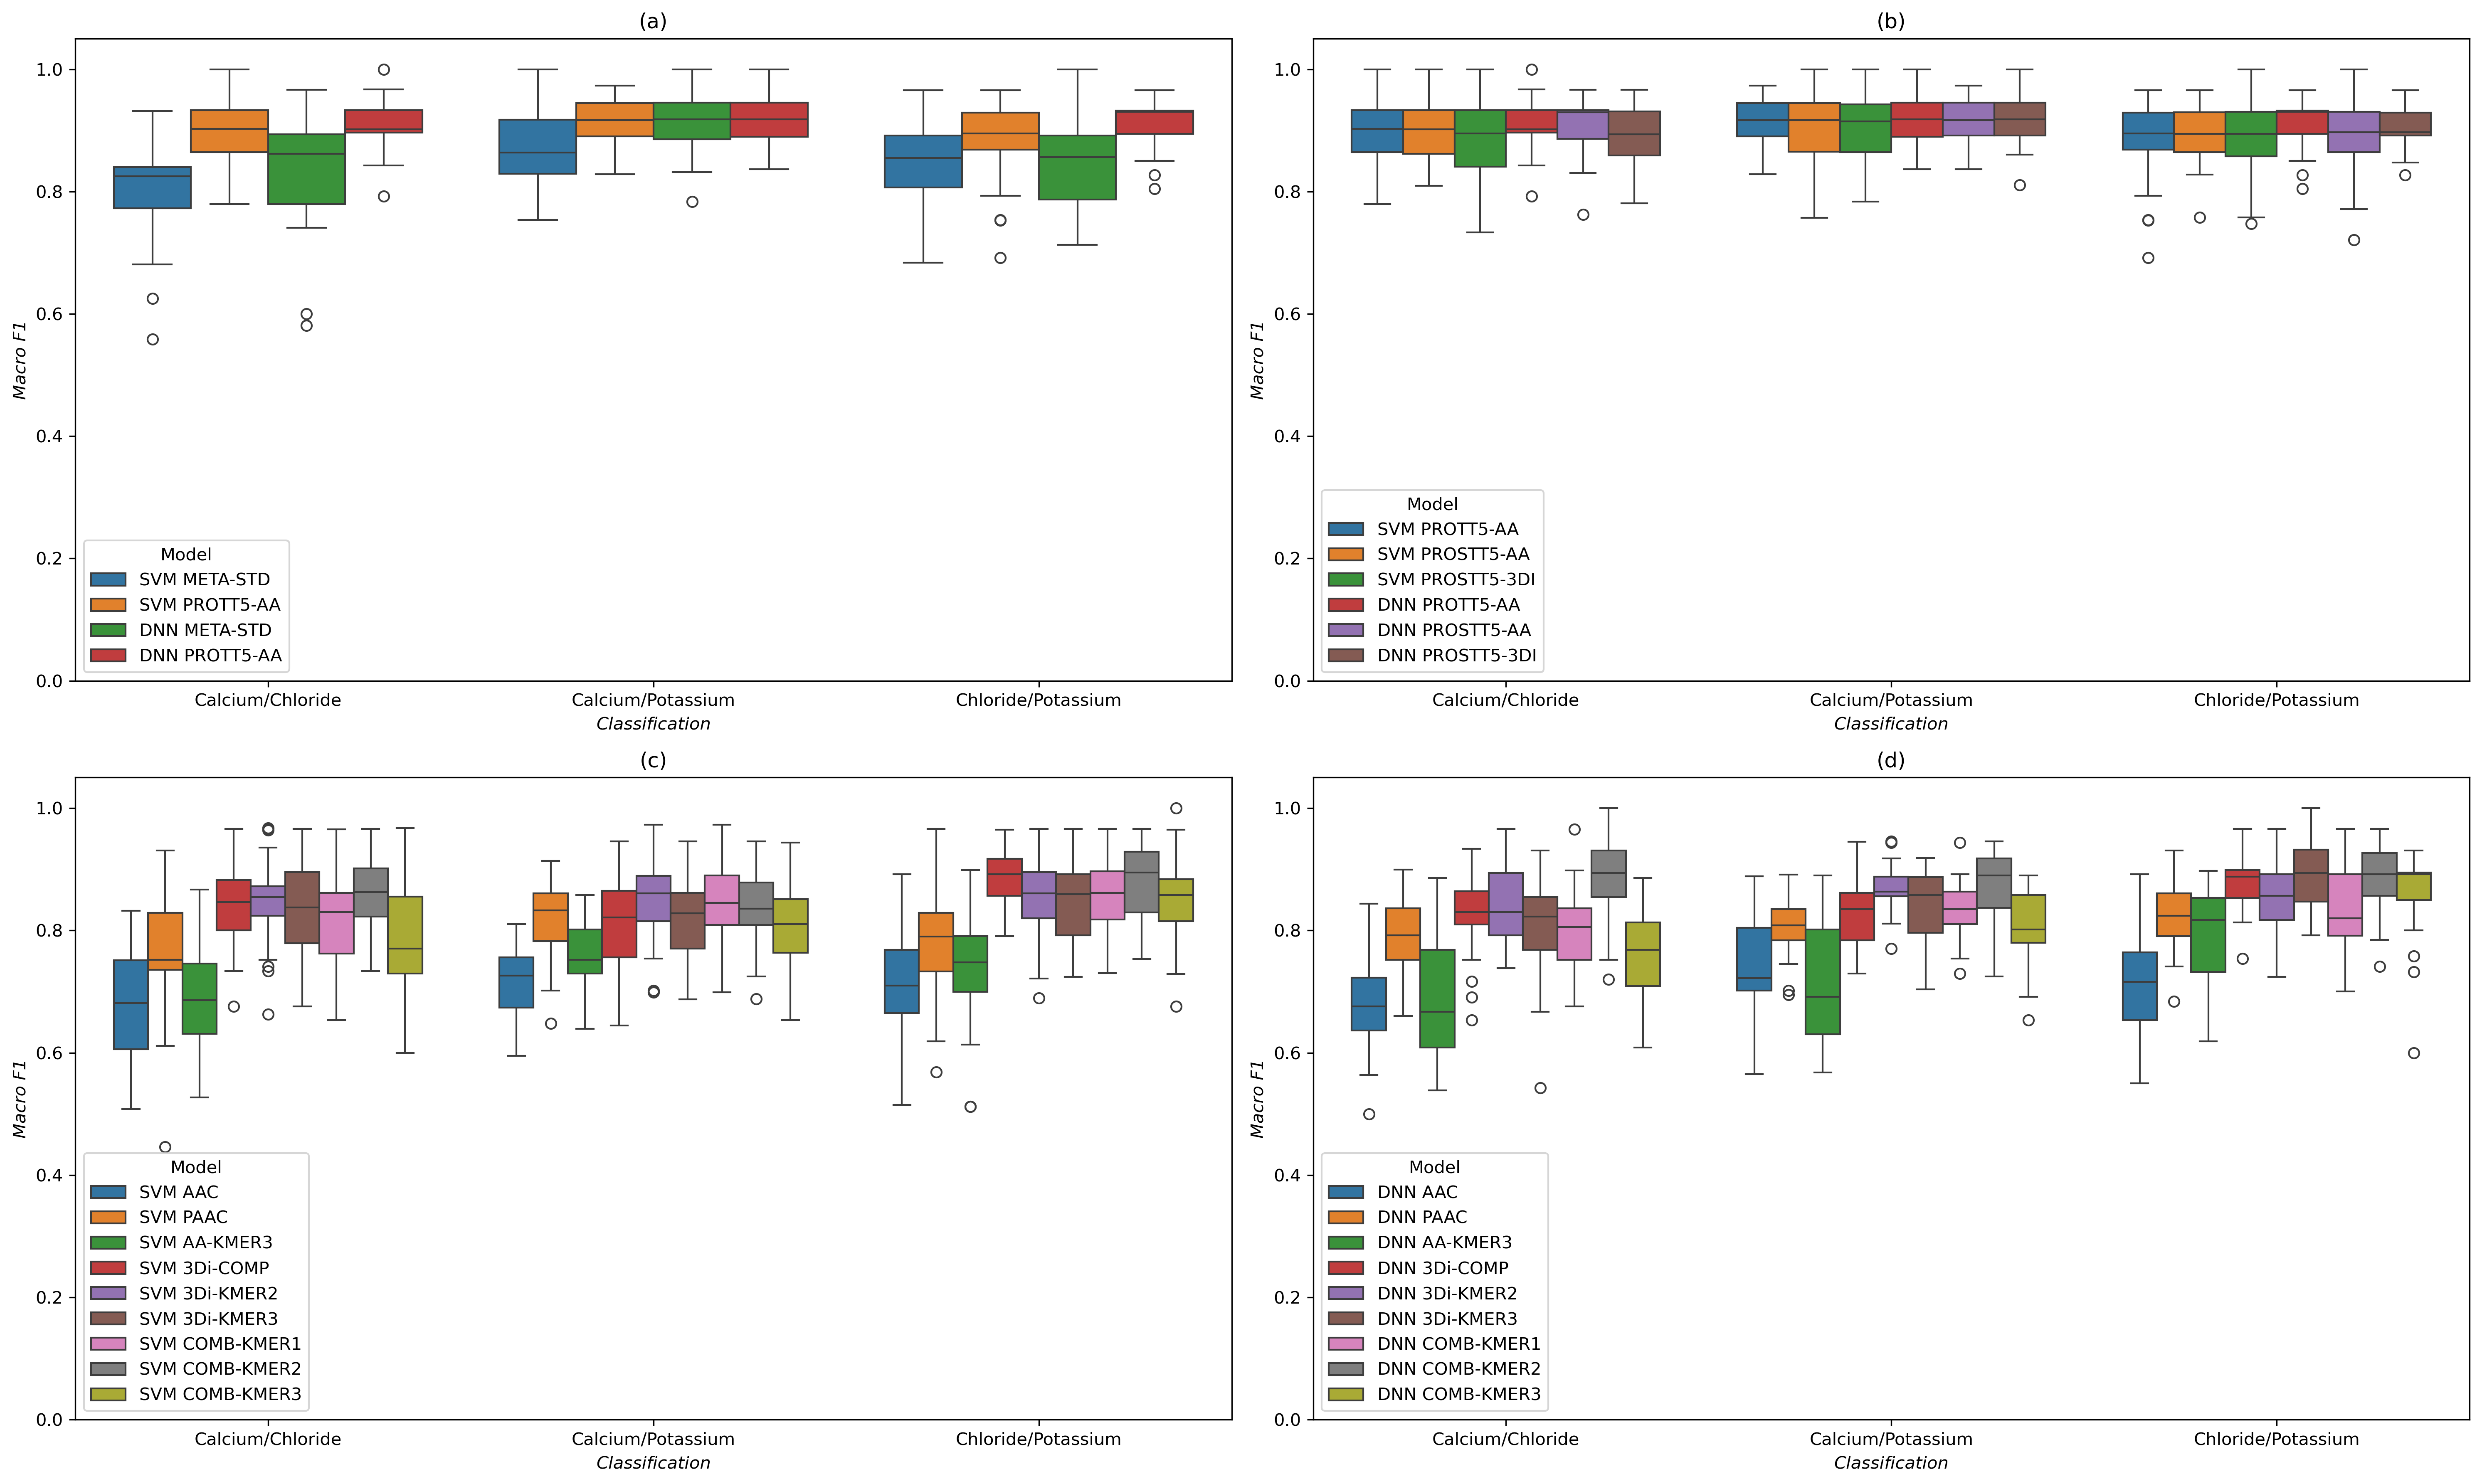

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12), dpi=300)

create_model_plot(
    df_plots,
    hue_order=[
        "SVM META-STD",
        "SVM PROTT5-AA",
        "DNN META-STD",
        "DNN PROTT5-AA",
    ],
    ax=axs[0, 0]
)
create_model_plot(
    df_plots,
    hue_order=[
        "SVM PROTT5-AA",
        "SVM PROSTT5-AA",
        "SVM PROSTT5-3DI",
        "DNN PROTT5-AA",
        "DNN PROSTT5-AA",
        "DNN PROSTT5-3DI",
    ],
    ax=axs[0, 1]
)
create_model_plot(
    df_plots,
    hue_order=[
        "DNN AAC",
        "DNN PAAC",
        "DNN AA-KMER3",
        "DNN 3Di-COMP",
        "DNN 3Di-KMER2",
        "DNN 3Di-KMER3",
        "DNN COMB-KMER1",
        "DNN COMB-KMER2",
        "DNN COMB-KMER3",
    ],
    ax=axs[1, 1]
)
create_model_plot(
    df_plots,
    hue_order=[
        "SVM AAC",
        "SVM PAAC",
        "SVM AA-KMER3",
        "SVM 3Di-COMP",
        "SVM 3Di-KMER2",
        "SVM 3Di-KMER3",
        "SVM COMB-KMER1",
        "SVM COMB-KMER2",
        "SVM COMB-KMER3",
    ],
    ax=axs[1, 0]
)
# axs[0, 0].text(0.9,0.1,"(a)",fontsize=14)
# axs[0, 1].text(0.9,0.1,"(b)",fontsize=14)
# axs[1, 0].text(0.9,0.1,"(c)",fontsize=14)
# axs[1, 1].text(0.9,0.1,"(d)",fontsize=14)
axs[0, 0].set_title('(a)')
axs[0, 1].set_title('(b)')
axs[1, 0].set_title('(c)')
axs[1, 1].set_title('(d)')
plt.tight_layout()
plt.savefig("../data/results/plots_human_ion", dpi=300)
plt.show()

## Tables

In [17]:
df_table = df_human_results.copy()
df_table = df_table[df_table.Metric == "F1 Macro"]
df_table.Substrates = (
    df_table.Substrates.str.replace("Calcium", "Ca")
    .str.replace("Chloride", "Cl")
    .str.replace("Potassium", "K")
)
df_table_str = (
    df_table.groupby(["Feature", "Metric", "Model", "Substrates"])
    .mean()
    .map(lambda x: f"{x:.3f}")
    + "±"
    + df_table.groupby(["Feature", "Metric", "Model", "Substrates"])
    .std()
    .map(lambda x: f"{x:.3f}".lstrip("0"))
)
df_table_str = df_table_str.reset_index().pivot(
    index="Feature", columns=["Model", "Substrates"], values="Value"
)

df_table_str.index = df_table_str.index.str.replace("PSSM-META", "MULTI-PSSM")
index_order = [
    "DUMMY",
    "AAC",
    "PAAC",
    "AA-KMER3",
    "3Di-COMP",
    "3Di-KMER2",
    "3Di-KMER3",
    "COMB-KMER1",
    "COMB-KMER2",
    "COMB-KMER3",
    "PSSM-50-1",
    "PSSM-50-3",
    "PSSM-90-1",
    "PSSM-90-3",
    "MULTI-PSSM",
    "META",
    "META-STD",
    "PROTT5-AA",
    "PROSTT5-AA",
    "PROSTT5-3DI",
]
df_table_str = df_table_str.loc[index_order]
df_table_str

Model               DNN                                 SVM              \
Substrates        Ca/Cl        Ca/K        Cl/K       Ca/Cl        Ca/K   
Feature                                                                   
DUMMY        0.464±.078  0.479±.071  0.498±.088  0.420±.066  0.492±.081   
AAC          0.678±.079  0.735±.081  0.712±.088  0.670±.091  0.719±.059   
PAAC         0.794±.062  0.809±.050  0.828±.063  0.768±.092  0.813±.057   
AA-KMER3     0.679±.097  0.721±.107  0.798±.078  0.692±.085  0.756±.057   
3Di-COMP     0.825±.066  0.826±.050  0.876±.050  0.842±.058  0.809±.076   
3Di-KMER2    0.844±.062  0.867±.038  0.845±.058  0.850±.062  0.852±.060   
3Di-KMER3    0.809±.082  0.837±.065  0.894±.060  0.831±.071  0.820±.063   
COMB-KMER1   0.804±.070  0.831±.049  0.837±.071  0.817±.074  0.842±.058   
COMB-KMER2   0.886±.069  0.874±.058  0.882±.059  0.860±.060  0.839±.055   
COMB-KMER3   0.759±.072  0.808±.063  0.861±.076  0.783±.087  0.804±.070   
PSSM-50-1    0.772±.075  0.813±.054  0.791±.071  0.749±.087  0.799±.081   
PSSM-50-3    0.798±.064  0.867±.057  0.811±.075  0.795±.074  0.830±.062   
PSSM-90-1    0.773±.075  0.769±.083  0.778±.083  0.718±.089  0.740±.059   
PSSM-90-3    0.795±.064  0.775±.065  0.781±.087  0.718±.089  0.740±.059   
MULTI-PSSM   0.791±.078  0.825±.065  0.785±.082  0.753±.079  0.782±.071   
META         0.788±.083  0.828±.060  0.812±.065  0.789±.076  0.810±.059   
META-STD     0.831±.094  0.908±.054  0.850±.080  0.806±.069  0.872±.061   
PROTT5-AA    0.911±.043  0.922±.043  0.918±.043  0.901±.055  0.913±.035   
PROSTT5-AA   0.907±.049  0.915±.041  0.898±.061  0.904±.048  0.904±.051   
PROSTT5-3DI  0.889±.050  0.919±.043  0.908±.038  0.886±.059  0.903±.044   

Model                    
Substrates         Cl/K  
Feature                  
DUMMY        0.471±.078  
AAC          0.705±.081  
PAAC         0.787±.083  
AA-KMER3     0.741±.077  
3Di-COMP     0.885±.043  
3Di-KMER2    0.854±.065  
3Di-KMER3    0.845±.061  
COMB-KMER1   0.864±.061  
COMB-KMER2   0.880±.060  
COMB-KMER3   0.847±.058  
PSSM-50-1    0.783±.071  
PSSM-50-3    0.806±.069  
PSSM-90-1    0.759±.067  
PSSM-90-3    0.759±.067  
MULTI-PSSM   0.770±.077  
META         0.784±.082  
META-STD     0.839±.072  
PROTT5-AA    0.889±.056  
PROSTT5-AA   0.898±.045  
PROSTT5-3DI  0.890±.061

In [18]:
print(
    df_table_str.to_latex()
    .replace("tabular", "tabular*")
    .replace("{lllllll}", "{\\textwidth}{@{\\extracolsep{\\fill}} lrrrrrr}")
)

\begin{tabular*}{\textwidth}{@{\extracolsep{\fill}} lrrrrrr}
\toprule
Model & \multicolumn{3}{r}{DNN} & \multicolumn{3}{r}{SVM} \\
Substrates & Ca/Cl & Ca/K & Cl/K & Ca/Cl & Ca/K & Cl/K \\
Feature &  &  &  &  &  &  \\
\midrule
DUMMY & 0.464±.078 & 0.479±.071 & 0.498±.088 & 0.420±.066 & 0.492±.081 & 0.471±.078 \\
AAC & 0.678±.079 & 0.735±.081 & 0.712±.088 & 0.670±.091 & 0.719±.059 & 0.705±.081 \\
PAAC & 0.794±.062 & 0.809±.050 & 0.828±.063 & 0.768±.092 & 0.813±.057 & 0.787±.083 \\
AA-KMER3 & 0.679±.097 & 0.721±.107 & 0.798±.078 & 0.692±.085 & 0.756±.057 & 0.741±.077 \\
3Di-COMP & 0.825±.066 & 0.826±.050 & 0.876±.050 & 0.842±.058 & 0.809±.076 & 0.885±.043 \\
3Di-KMER2 & 0.844±.062 & 0.867±.038 & 0.845±.058 & 0.850±.062 & 0.852±.060 & 0.854±.065 \\
3Di-KMER3 & 0.809±.082 & 0.837±.065 & 0.894±.060 & 0.831±.071 & 0.820±.063 & 0.845±.061 \\
COMB-KMER1 & 0.804±.070 & 0.831±.049 & 0.837±.071 & 0.817±.074 & 0.842±.058 & 0.864±.061 \\
COMB-KMER2 & 0.886±.069 & 0.874±.058 & 0.882±.059 & 0.860±.06